In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import re
import seaborn as sb

In [2]:
df = pd.read_excel('C:\\Users\\user\\OneDrive\\Desktop\\BCRA.xlsx')

In [3]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-15,2017-06-19,Alive
1,TCGA-EW-A1OX,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,2017-04-26,2018-11-09,Dead
2,TCGA-A8-A079,69,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-09-08,2018-06-09,Alive
3,TCGA-D8-A1XR,56,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-25,2017-07-12,Alive
4,TCGA-BH-A0BF,56,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-05-06,2019-06-27,Dead


In [4]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [5]:
df.shape

(334, 16)

In [6]:
df.dtypes

Patient_ID                    object
Age                            int64
Gender                        object
Protein1                     float64
Protein2                     float64
Protein3                     float64
Protein4                     float64
Tumour_Stage                  object
Histology                     object
ER status                     object
PR status                     object
HER2 status                   object
Surgery_type                  object
Date_of_Surgery       datetime64[ns]
Date_of_Last_Visit    datetime64[ns]
Patient_Status                object
dtype: object

Seprate the data in Numerical and Catagorical


In [7]:
Numerical_ftr = []
for ftr in df.columns:
    if df[ftr].dtypes != 'O':
        Numerical_ftr.append(ftr)

In [8]:
Numerical_ftr

['Age',
 'Protein1',
 'Protein2',
 'Protein3',
 'Protein4',
 'Date_of_Surgery',
 'Date_of_Last_Visit']

In [9]:
Continous_ftr = []
for ftr in Numerical_ftr:
    if len(df[ftr].unique()) > 25:
        Continous_ftr.append(ftr)

In [10]:
Continous_ftr

['Age',
 'Protein1',
 'Protein2',
 'Protein3',
 'Protein4',
 'Date_of_Surgery',
 'Date_of_Last_Visit']

In [11]:
Descrete_ftr = []
for ftr in Numerical_ftr:
    if len(df[ftr].unique()) < 25:
        Descrete_ftr.append(ftr)

No Descrete feature is found

In [12]:
Descrete_ftr

[]

Find and Fill missing values 

In [13]:
df.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [15]:
Catagorical_ftr = []
for ftr in df.columns:
    if df[ftr].dtypes == 'O':
        Catagorical_ftr.append(ftr)

In [16]:
Catagorical_ftr = ['Gender',
 'Tumour_Stage',
 'Histology',
 'ER status',
 'PR status',
 'HER2 status',
 'Surgery_type',
 'Patient_Status']

Below features have only two items Positive and Nagetive. We need to Change numbers Negative into 0 and Positive into 1

In [18]:
p_n = ['ER status','PR status','HER2 status']

In [19]:
for x in p_n:
    df[x] = np.where(df[x]=='Positive',1,0)

In [20]:
df[p_n]

,ER status,PR status,HER2 status
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0
...,...,...,...
329,1,1,1
330,1,1,0
331,1,1,0
332,1,1,1


In [21]:
# we dont need a column of Patient ID. So we can drop it.
del df['Patient_ID']

Change Gender feature into number Female into 1 and Male into 0

In [22]:
df['Gender'] = np.where(df['Gender']=='FEMALE',1,0)

In [23]:
df.head(2)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,36,1,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,1,1,0,Modified Radical Mastectomy,2017-01-15,2017-06-19,Alive
1,43,1,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,1,1,0,Lumpectomy,2017-04-26,2018-11-09,Dead


In [24]:
df['Patient_Status'] = np.where(df['Patient_Status']=='Alive',1,0)

Calculate Number of days between Surgery and Last Visit

In [25]:
df['No. of day btw Surgery and Last Visit'] = df['Date_of_Last_Visit'] - df['Date_of_Surgery']

In [26]:
df['No. of day btw Surgery and Last Visit']

0     155 days
1     562 days
2     274 days
3     168 days
4     782 days
        ...   
329    90 days
330   124 days
331   434 days
332   456 days
333   421 days
Name: No. of day btw Surgery and Last Visit, Length: 334, dtype: timedelta64[ns]

In [27]:
df.head(2)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,No. of day btw Surgery and Last Visit
0,36,1,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,1,1,0,Modified Radical Mastectomy,2017-01-15,2017-06-19,1,155 days
1,43,1,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,1,1,0,Lumpectomy,2017-04-26,2018-11-09,0,562 days


Convert all Catagorical features into number

In [28]:
df['Tumour_Stage'] = df['Tumour_Stage'].astype(CategoricalDtype(categories=['III', 'II', 'I'],ordered = True)).cat.codes
df['Histology'] = df['Histology'].astype(CategoricalDtype(categories=['Infiltrating Ductal Carcinoma','Mucinous Carcinoma','Infiltrating Lobular Carcinoma'],ordered = True)).cat.codes
df['Surgery_type'] = df['Surgery_type'].astype(CategoricalDtype(categories=['Modified Radical Mastectomy','Lumpectomy','Other','Simple Mastectomy'],ordered = True)).cat.codes

In [29]:
df_num = df.copy()

In [30]:
df_num.head(2)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,No. of day btw Surgery and Last Visit
0,36,1,0.080353,0.42638,0.54715,0.273680,0,0,1,1,0,0,2017-01-15,2017-06-19,1,155 days
1,43,1,-0.420320,0.57807,0.61447,-0.031505,1,1,1,1,0,1,2017-04-26,2018-11-09,0,562 days


In [31]:
df_num.isnull().sum()

Age                                       0
Gender                                    0
Protein1                                  0
Protein2                                  0
Protein3                                  0
Protein4                                  0
Tumour_Stage                              0
Histology                                 0
ER status                                 0
PR status                                 0
HER2 status                               0
Surgery_type                              0
Date_of_Surgery                           0
Date_of_Last_Visit                       17
Patient_Status                            0
No. of day btw Surgery and Last Visit    17
dtype: int64

Fill missing values

In [32]:
df_num.rename(columns = {'No. of day btw Surgery and Last Visit': 'S_V'}, inplace = True)

In [33]:
df_num.head(2)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,S_V
0,36,1,0.080353,0.42638,0.54715,0.273680,0,0,1,1,0,0,2017-01-15,2017-06-19,1,155 days
1,43,1,-0.420320,0.57807,0.61447,-0.031505,1,1,1,1,0,1,2017-04-26,2018-11-09,0,562 days


In [34]:
df_num.drop(['Date_of_Surgery','Date_of_Last_Visit'],axis=1,inplace=True)

In [35]:
df_num['S_V'] = pd.to_numeric(df_num['S_V'].dt.days, downcast='integer')

In [38]:
df_num['S_V1'].isnull().sum()

0

In [37]:
df_num['S_V1'] = df_num['S_V'].fillna(df_num['S_V'].median())

In [39]:
df_num.drop('S_V', axis=1, inplace=True)

In [40]:
df_num['Patient_Status'] = np.where(df_num['Patient_Status']==1,'Alive','Death')

In [41]:
df_num.columns

Index(['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status',
       'Surgery_type', 'Patient_Status', 'S_V1'],
      dtype='object')

In [42]:
df_num = df_num[['Age','Gender','Protein1','Protein2', 'Protein3', 'Protein4','Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status',
       'Surgery_type', 'S_V1','Patient_Status']]

Now we have converted all columns into a number

In [43]:
df_num.to_excel('New_BCRA.xlsx')

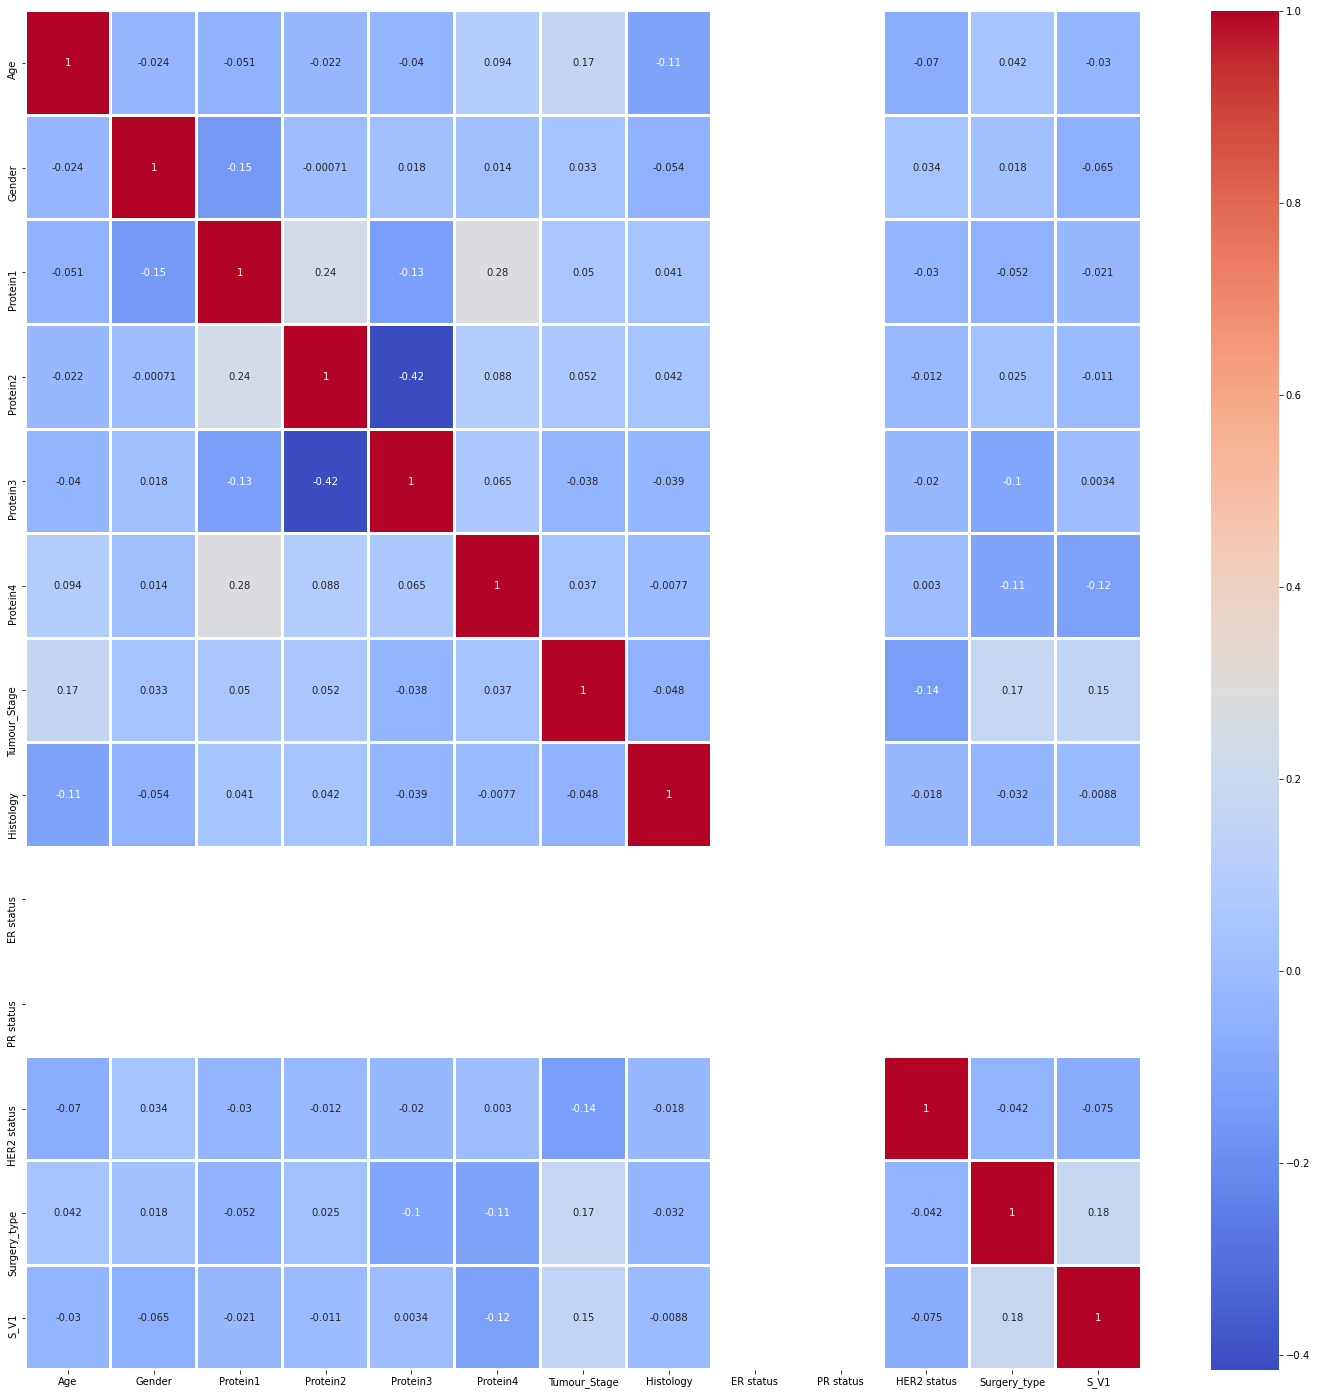

In [44]:
plt.figure(figsize=(25,25))
heat_map = sb.heatmap(df_num.corr(),cmap='coolwarm',annot=True, linewidth = 2)

In [45]:
df_brca = pd.read_excel('New_BCRA.xlsx')

In [51]:
print('variance of ER status is  ', df_brca['ER status'].var())
print('variance of PR status is  ', df_brca['PR status'].var())

variance of ER status is   0.0
variance of PR status is   0.0


### As we can see in above Heat Map two features are blank (ER status and PR status)
### because thier variance is Zero. So we can remove them from our dataframe


In [52]:
df_brca = df_brca.drop(['ER status','PR status'],axis=1)

In [54]:
df_brca['Patient_Status'] = np.where(df_brca['Patient_Status']=='Alive',1,0)

In [55]:
df_brca.head()

,Unnamed: 0,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,S_V1,Patient_Status
0,0,36,1,0.080353,0.42638,0.54715,0.273680,0,0,0,0,155,1
1,1,43,1,-0.420320,0.57807,0.61447,-0.031505,1,1,0,1,562,0
2,2,69,1,0.213980,1.31140,-0.32747,-0.234260,0,0,0,2,274,1
3,3,56,1,0.345090,-0.21147,-0.19304,0.124270,1,0,0,0,168,1
4,4,56,1,0.221550,1.90680,0.52045,-0.311990,1,0,0,2,782,0


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score

In [57]:
X = df_brca.iloc[:,0:13]
y = df_brca.iloc[:,-1]

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=5)

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 10)

In [61]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=10)

In [62]:
rsc = RandomForestClassifier(n_jobs=-1)
params = {'max_depth':[3,5,10,15,None],
         'n_estimators':[50,100,200,300,400,500],
         'max_features':randint(1,3),
         'bootstrap':[True,False],
         'min_samples_leaf':randint(1,4),
         'criterion':['entropy','gini']}

In [63]:
def tuning_rscv(est,p_dist,nbr_iter,X,y):
    rndscv = RandomizedSearchCV(est, param_distributions=p_dist,
                               n_jobs=-1,n_iter=nbr_iter,cv=9)
    rndscv.fit(X,y)
    ht_params = rndscv.best_params_
    ht_score = rndscv.best_score_
    return ht_params,ht_score

In [64]:
rf_parameters , rf_ht_score = tuning_rscv(rsc,params,25,X,y)

In [65]:
print(rf_parameters)
print(rf_ht_score)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 300}
1.0


In [66]:
rsc = RandomForestClassifier(n_jobs=-1,bootstrap = True, criterion = 'gini',
                            max_depth = 10, max_features = 2,min_samples_leaf = 1,
                            n_estimators = 300)

In [67]:
rsc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=2, n_estimators=300,
                       n_jobs=-1)

In [68]:
y_pred = rsc.predict(X_test)

In [69]:
acc = accuracy_score(y_test,y_pred)

In [70]:
acc

1.0

In [76]:
len(y_test)

67

Let take random data/inputs to predict

In [83]:
new_value = [52,1,0.081131,0.33517,0.36257,0.18279,0,0,1,1,0,0,15]

In [84]:
new_value = np.array([new_value])

In [85]:
if rsc.predict(new_value) == 1:
    print('Alive')
else:
    print('Death')

Alive
